## Exploratory Data Analysis: Visualize Source Data
- Use a Counts plot to visualize number of instances of each genre
- Use a Scatterplot Matrix to visualize pair-wise correlations between different features in the dataset in one place

In [2]:
# Import data
%store -r musicbeats

#### Number of each Genre Instances 

In [3]:
# Import necessary modules
import seaborn as sns; sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import pylab as pl

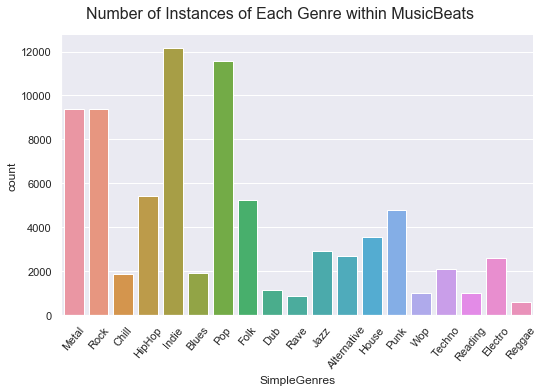

In [4]:
# View counts
ax = sns.catplot(x="SimpleGenres", data=musicbeats, aspect=1.5, kind="count")
ax.fig.subplots_adjust(top=0.9)
ax.set_xticklabels(rotation=50)
ax.fig.suptitle('Number of Instances of Each Genre within MusicBeats', fontsize=16)
plt.show()

#### Assessing Correlation of Co-Efficients

In [5]:
# Create a correlation dataframe
feature_corr = musicbeats.corr()
feature_corr

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature
Danceability,1.000000,0.085840,0.028094,0.184340,-0.058505,0.128191,-0.133814,-0.176338,-0.096899,0.466527,-0.084355,-0.090894,0.169391
Energy,0.085840,1.000000,0.030325,0.777078,-0.028915,0.105022,-0.722825,-0.159389,0.183757,0.231796,0.227372,-0.012322,0.160863
Key,0.028094,0.030325,1.000000,0.018524,-0.166464,0.026550,-0.027710,0.001603,-0.002285,0.023278,0.003781,0.010581,0.012753
Loudness,0.184340,0.777078,0.018524,1.000000,-0.012096,0.042177,-0.601857,-0.371484,0.110873,0.236044,0.174872,-0.095715,0.148544
Mode,-0.058505,-0.028915,-0.166464,-0.012096,1.000000,-0.046509,0.039739,-0.047964,0.008585,0.026513,0.018149,-0.045754,-0.020023
Speechness,0.128191,0.105022,0.026550,0.042177,-0.046509,1.000000,-0.006039,-0.115895,0.185406,0.035008,0.011056,0.047948,-0.004907
Acousticness,-0.133814,-0.722825,-0.027710,-0.601857,0.039739,-0.006039,1.000000,0.115110,-0.083420,-0.084511,-0.189845,-0.062050,-0.171251
Instrumentalness,-0.176338,-0.159389,0.001603,-0.371484,-0.047964,-0.115895,0.115110,1.000000,-0.075751,-0.298873,-0.007171,0.225852,-0.067023
Liveness,-0.096899,0.183757,-0.002285,0.110873,0.008585,0.185406,-0.083420,-0.075751,1.000000,-0.001384,0.023978,0.013702,-0.001314
Valence,0.466527,0.231796,0.023278,0.236044,0.026513,0.035008,-0.084511,-0.298873,-0.001384,1.000000,0.049407,-0.236994,0.104475


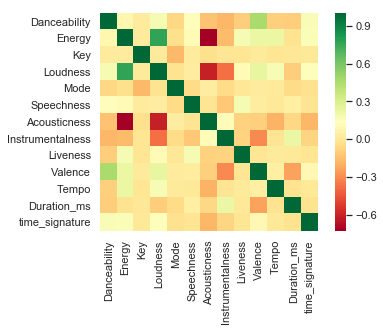

In [6]:
# Plot a correlation heatmap
sns.heatmap(feature_corr, square=True, cmap='RdYlGn')

*Observations*: It appears that the strongest correlations are between **Energy and Loudness (+0.777078)** followed by **Energy and Acousticness (-0.722825)** and **Loudness and Acousticness (-0.601857)**.

#### General Genre Clusters Based on Top Features

In [7]:
# Group Data by Genre
grouped = musicbeats.groupby('SimpleGenres').mean().reset_index()
grouped.head()

,SimpleGenres,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature
0,Alternative,0.537484,0.645039,5.138138,-7.409021,0.710586,0.053028,0.248278,0.050973,0.174372,0.503441,122.802973,228431.769895,3.944069
1,Blues,0.553864,0.536861,5.064533,-9.796570,0.688353,0.059828,0.473229,0.175022,0.182700,0.574219,118.353095,232039.607555,3.828961
2,Chill,0.603644,0.622935,5.570896,-9.692342,0.475480,0.054316,0.212409,0.506362,0.176281,0.305165,120.554701,329848.619936,3.934435
3,Dub,0.706068,0.690710,5.586513,-9.760487,0.528838,0.086203,0.070868,0.682191,0.167673,0.329996,127.274645,379216.406389,3.962733
4,Electro,0.701075,0.749440,5.594971,-6.586397,0.519149,0.083927,0.145510,0.211459,0.184210,0.598898,121.843522,256328.423598,3.977176


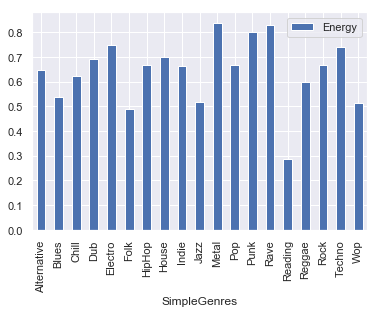

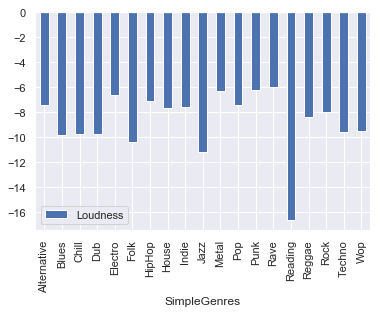

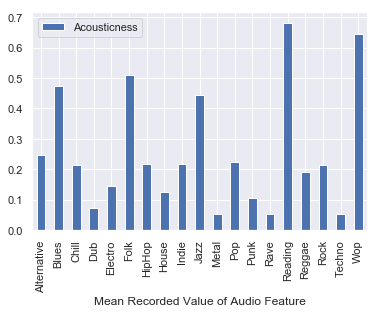

In [8]:
# Plot the variation of audio values by genre
grouped.plot(kind='bar',x='SimpleGenres',y='Energy')
grouped.plot(kind='bar',x='SimpleGenres',y='Loudness')
grouped.plot(kind='bar',x='SimpleGenres',y='Acousticness')
plt.xlabel('Mean Recorded Value of Audio Feature')
plt.show()

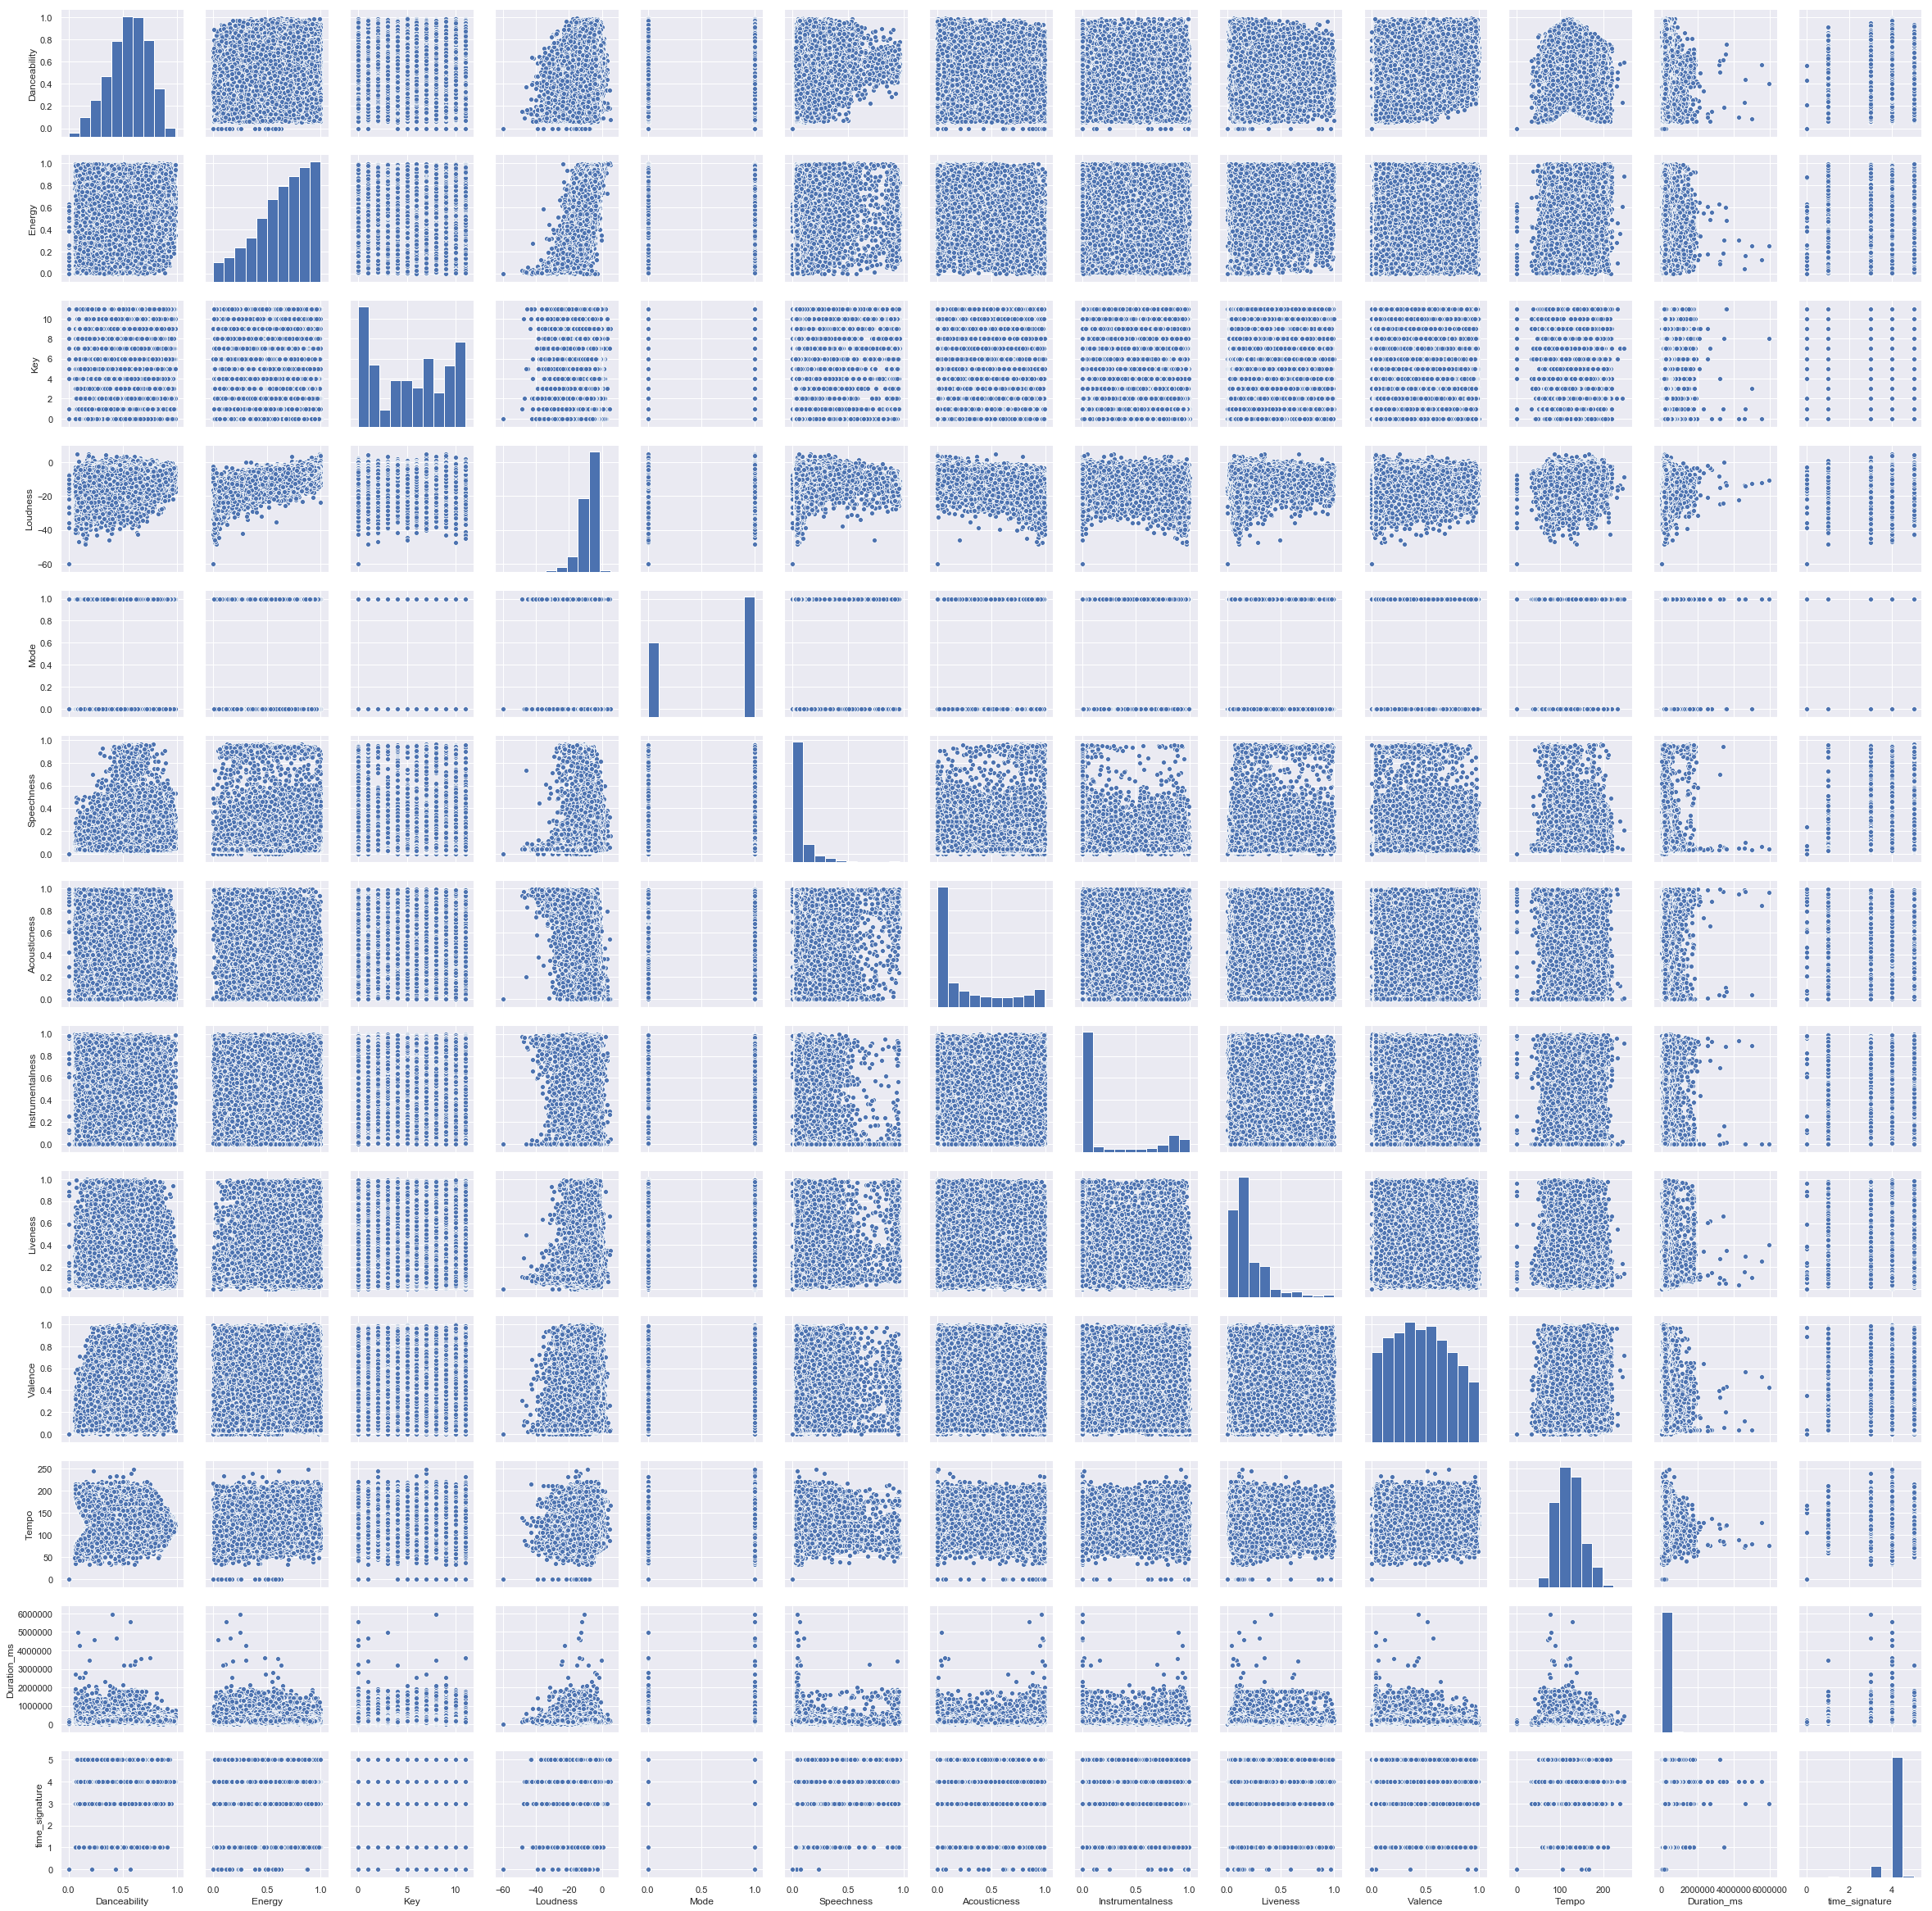

In [10]:
# Show overall interaction of features with each other as well as target variable, SimpleGenres
sns.pairplot(musicbeats)